## Problem definition
The [Car-Ads](https://www.kaggle.com/mirosval/personal-cars-classifieds) dataset contains data of car scrapped from the web. Different attributes of data are:
- maker
- model
- mileage
- manufacture_year
- engine_displacement
- engine_power
- body_type
- color_slug
- stk_year
- transmission
- door_count
- seat_count
- fuel_type
- date_created
- date_last_seen
- price_eur

Here, __price_eur__ is dependent attribute and all other are indpendent attribute. We need to predict __price_eur__ based on the value of other attribute.

## Importing required libraries

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
%matplotlib inline

### Reading data

In [50]:
# Here I am not using all the dataset but using filtering only 2 lakhs tuples
df = pd.read_csv('../data/Car-Ads.csv')
print("Total rows in datasets: {}".format(len(df)))
df.head()

Total rows in datasets: 200000


,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,seat,leon,178000.0,2000.0,1390.0,55.0,NaN,NaN,None,man,4,5,gasoline,2016-01-03 19:42:48.205853+00:00,2016-01-07 00:56:35.766128+00:00,2500.30
1,NaN,NaN,135000.0,2007.0,1149.0,55.0,NaN,NaN,None,man,4,5,gasoline,2015-12-08 08:46:03.020179+00:00,2016-01-18 19:02:24.218185+00:00,2980.24
2,audi,NaN,138000.0,2005.0,1984.0,147.0,other,NaN,NaN,man,4.0,5.0,NaN,2016-03-05 22:09:11.127858+00:00,2016-07-03 17:39:48.838084+00:00,8010.25
3,fiat,punto,105000.0,2009.0,NaN,NaN,NaN,NaN,None,NaN,None,None,gasoline,2015-12-12 19:48:16.546082+00:00,2016-01-02 10:02:05.676711+00:00,2300.26
4,opel,vectra,129385.0,2003.0,NaN,NaN,NaN,NaN,None,NaN,None,None,gasoline,2016-01-01 17:28:46.527414+00:00,2016-01-17 22:49:09.853789+00:00,2800.30


In [3]:
# Data types
df.dtypes

maker                   object
model                   object
mileage                float64
manufacture_year       float64
engine_displacement    float64
engine_power           float64
body_type               object
color_slug              object
stk_year                object
transmission            object
door_count              object
seat_count              object
fuel_type               object
date_created            object
date_last_seen          object
price_eur              float64
dtype: object

Data type of __door_count__ and and __seat_count__ is object.  So let's convet them to numerical data type. Before that, let's explore it.

In [4]:
df['door_count'].unique()

array(['4', '4.0', 'None', '5.0', '5', nan, '2.0', '2', '3.0', '3', '0.0',
       '6', '6.0', '1.0', '7.0', '49.0', '8.0', '77.0'], dtype=object)

In [5]:
df['seat_count'].unique()

array(['5', '5.0', 'None', '4', nan, '3.0', '4.0', '7.0', '9.0', '2',
       '2.0', '7', '9', '3', '0.0', '8', '8.0', '6.0', '6', '1.0', '1',
       '13.0', '14', '17.0', '20.0', '19.0', '14.0', '44.0', '58.0',
       '10.0', '45.0', '85.0', '55.0', '12', '512.0', '19', '50.0'],
      dtype=object)

In [51]:
df['seat_count'] = df['seat_count'].replace({'None':-1})
df['door_count'] = df['door_count'].replace({'None':-1})
df['seat_count'] = df['seat_count'].astype(float)
df['door_count'] = df['door_count'].astype(float)
df['seat_count'] = df['seat_count'].replace({-1: np.nan})
df['door_count'] = df['door_count'].replace({-1, np.nan})

The count of door and seat in car cann't be higher as indicated. Let's see the distribution of door and seat and replace outlier with __nan__.

In [7]:
df['door_count'].value_counts()

 4.0     64491
 5.0     51351
-1.0     24057
 2.0     16758
 3.0      7035
 0.0       441
 6.0        86
 1.0        19
 7.0         2
 8.0         1
 77.0        1
 49.0        1
Name: door_count, dtype: int64

In [8]:
df['seat_count'].value_counts()

5.0      101273
4.0       13615
7.0        5804
2.0        3913
3.0        2043
6.0         810
9.0         714
0.0         673
8.0         383
1.0          34
19.0          3
14.0          2
17.0          2
10.0          2
55.0          1
13.0          1
44.0          1
50.0          1
45.0          1
58.0          1
512.0         1
12.0          1
85.0          1
20.0          1
Name: seat_count, dtype: int64

We will replace __door_count__ of car with __door_count__>6 by __np.nan__. Similarly, we will replace __seat_count__ of car with __seat_count__ >9 by __np.nan__.

In [52]:
df['seat_count'] = df['seat_count'].apply(lambda x: np.nan if x > 9 else x)
df['door_count'] = df['door_count'].apply(lambda x: np.nan if x> 6 else x )

# replace -1 in door_count by 1.
df['door_count'] = df['door_count'].replace(to_replace = -1.0, value = 1.0)

Impute nan value of __seat_count__ and __door_count__ by the median value. 

In [53]:
df['door_count'].value_counts().index[0]


4.0

In [54]:
a = df['door_count'].value_counts().index[0]
b = df['seat_count'].value_counts().index[0]

In [55]:
df = df.fillna(value={'door_count': a, 'seat_count':b})
# fill door and seat with 0 value by median value
df['door_count'] = df['door_count'].replace(to_replace = 0.0, value =a)
df['seat_count'] = df['seat_count'].replace(to_replace = 0.0, value =b)

In [56]:
# Value_count of door and seat
print(df['seat_count'].value_counts())
df['door_count'].value_counts()

5.0    172684
4.0     13615
7.0      5804
2.0      3913
3.0      2043
6.0       810
9.0       714
8.0       383
1.0        34
Name: seat_count, dtype: int64


4.0    100694
5.0     51351
1.0     24076
2.0     16758
3.0      7035
6.0        86
Name: door_count, dtype: int64

Imputation of __transmission__ attribute. __transmission__ attribute has two values: man and auto. We will impute missing values based on the kernel density enstimation.

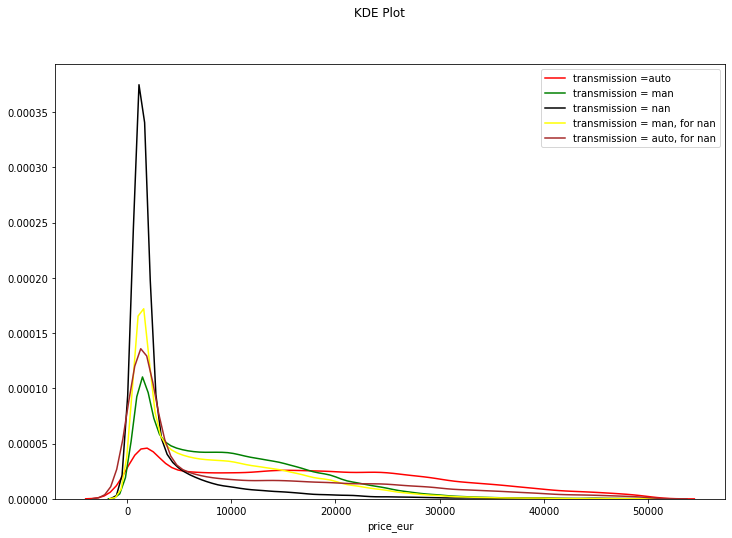

In [14]:
fig, ax = plt.subplots(figsize = (12,8))
fig.suptitle("KDE Plot")
sns.distplot(df.loc[df['transmission']=='auto']['price_eur'], kde = True, hist = False, color = 'red', ax = ax, label = "transmission =auto")
sns.distplot(df.loc[df['transmission']=='man']['price_eur'], kde = True, hist = False, color = 'green', ax = ax, label = "transmission = man")
sns.distplot(df.loc[df['transmission'].isnull()]['price_eur'], kde = True, hist = False, color = 'black', ax = ax, label = "transmission = nan")
a = df.fillna( value= {'transmission':'man'})
sns.distplot(a.loc[a['transmission']=='man']['price_eur'], kde = True, hist = False, color = 'yellow', ax = ax, label = "transmission = man, for nan")
b = df.fillna( value= {'transmission':'auto'})
sns.distplot(b.loc[b['transmission']=='auto']['price_eur'], kde = True, hist = False, color = 'brown', ax = ax, label = 'transmission = auto, for nan')


The green and yellow graph are highly alligned. So, replacing nan with man willnot change the distribution of data by too much. Moreover, most of the missing value have price in the lower range (i.e., 0-5000) which is similar to the distribution of car with __transmission__ = man. So we will replace __transmission__ = nan with __transmission__ = man.

In [15]:
df['transmission'] = df['transmission'].fillna('man')

In [16]:
df.dtypes

maker                   object
model                   object
mileage                float64
manufacture_year       float64
engine_displacement    float64
engine_power           float64
body_type               object
color_slug              object
stk_year                object
transmission            object
door_count             float64
seat_count             float64
fuel_type               object
date_created            object
date_last_seen          object
price_eur              float64
dtype: object

In [17]:
# Statistics of numerical data
df.describe(percentiles = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7, 0.8, 0.9,1])


,mileage,manufacture_year,engine_displacement,engine_power,door_count,seat_count,price_eur
count,1.822520e+05,181223.000000,159210.000000,170868.000000,200000.000000,200000.000000,200000.000000
mean,1.176200e+05,2002.016201,2007.140889,95.529801,3.693720,4.934235,10367.046366
std,3.420980e+05,75.521064,1942.129812,42.256414,1.272176,0.691305,9986.681152
min,0.000000e+00,0.000000,1.000000,3.000000,1.000000,1.000000,520.000000
0%,0.000000e+00,0.000000,1.000000,3.000000,1.000000,1.000000,520.000000
10%,1.000000e+01,2000.000000,1198.000000,52.000000,1.000000,5.000000,1295.340000
20%,1.130000e+04,2003.000000,1390.000000,66.000000,2.000000,5.000000,1295.340000
30%,2.919340e+04,2005.000000,1500.000000,74.000000,4.000000,5.000000,2350.000000
40%,6.000000e+04,2007.000000,1598.000000,80.000000,4.000000,5.000000,4501.330000
50%,8.900000e+04,2009.000000,1796.000000,85.000000,4.000000,5.000000,7400.000000


In [18]:
# Statistics of categorical data
df.describe(include = 'object')

,maker,model,body_type,color_slug,stk_year,transmission,fuel_type,date_created,date_last_seen
count,171819,137956,136005,12240,102359,200000,94681,200000,200000
unique,44,842,9,14,44,2,5,200000,190739
top,skoda,octavia,other,black,None,man,gasoline,2015-11-27 03:15:19.090319+00:00,2016-01-27 20:40:15.463610+00:00
freq,18006,7560,112218,2572,71553,157209,48333,1,9262


In [76]:
# Let's see all the unique value in categorical data
columns = list(df.columns.values)


for col in columns:
    if df[col].dtypes =='object':
        print("\n")
        print("************************")
        print("Unique count for column:{}\n".format(col))
        print(df[col].value_counts())



************************
Unique count for column:maker

skoda            18006
volkswagen       17147
bmw              14964
mercedes-benz    13866
audi             13802
ford             13684
opel             12491
fiat              7383
citroen           7141
renault           6194
peugeot           5380
hyundai           4656
seat              4310
toyota            4138
nissan            4093
kia               2894
mazda             2708
volvo             2662
mini              2015
smart             2008
suzuki            1825
mitsubishi        1643
honda             1470
chevrolet         1181
rover             1051
jeep               926
lancia             783
porsche            647
subaru             571
chrysler           534
jaguar             500
alfa-romeo         269
dodge              257
lexus              202
dacia              117
land-rover          87
isuzu               71
maserati            39
hummer              30
infinity            28
bentley             23

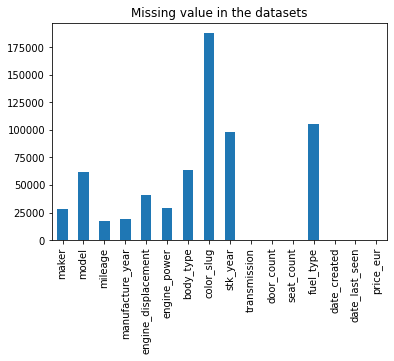

In [19]:
# Let's see if there are any null value present in data
df.apply(lambda x: sum(x.isnull())).plot(kind = 'bar', title = 'Missing value in the datasets')

This shows that the data contains very large number of missing values

Let's see how numerical data are correlated with each othe.

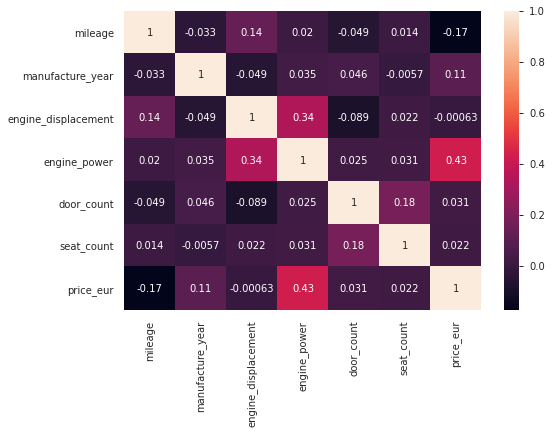

In [78]:
correlation = df.corr()
sns.heatmap(data = correlation, annot = True)

This shows that, the output variable __price_eur__ is highly correlated with __engine_power__.

## Visualization
Let's see the histogram plot.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2b08a56d8>,
      dtype=object)

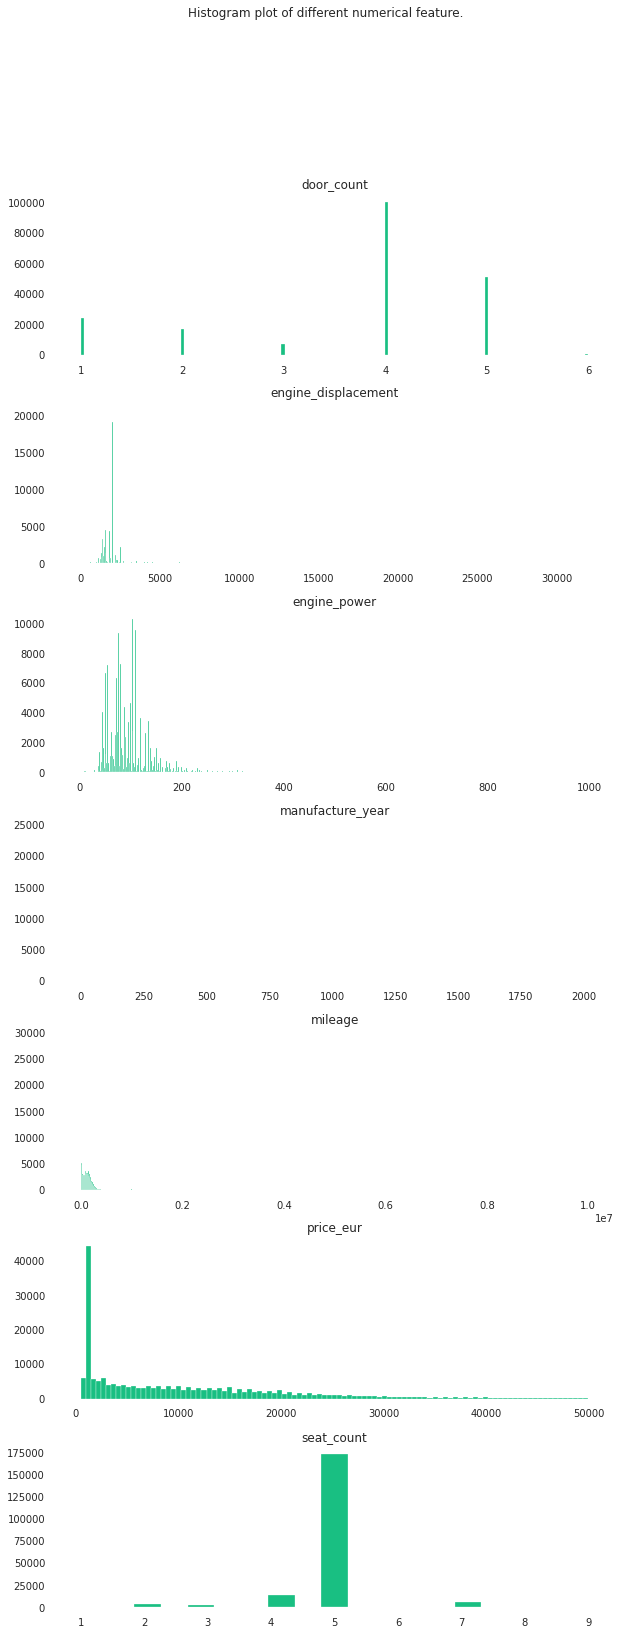

In [79]:
# Histogram plot
fig, ax = plt.subplots(7,1, figsize = (10, 26))
fig.suptitle("Histogram plot of different numerical feature.")
df.hist(bins = 'auto', ax = ax, grid = False , color='#19bf82')

As already seen, the attribute __color_slug__ contains lots of missing values. So let's drop this attribute.

In [20]:
df1 = df.drop('color_slug', axis = 1)

## Visualization

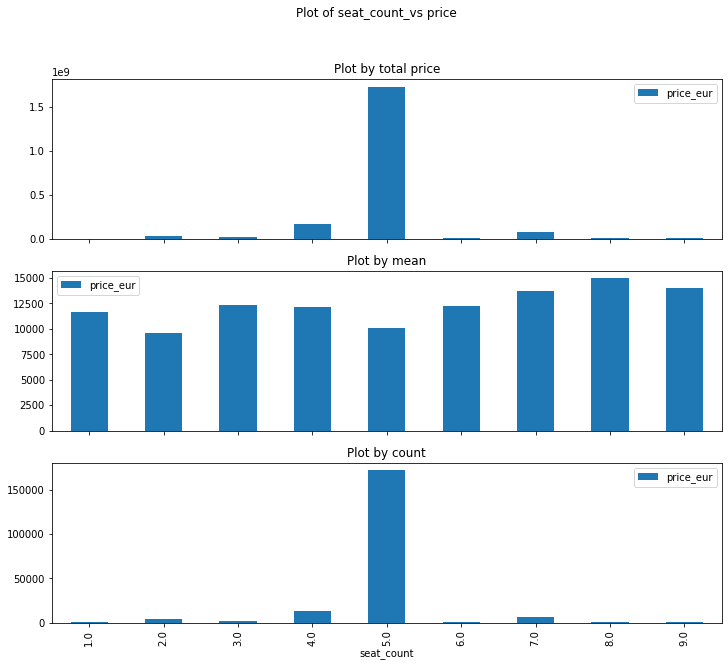

In [36]:
# Let's define a function which for plotting price of car with respect to other columns.
# Here we will plot total price, average price and count of occurence of sales based on particular feature of each column.
def plot_of_price_vs_other(df, value, index, title):
    a = df.pivot_table(values = value, index = index, aggfunc = [np.sum, np.mean, len])
    fig, axes = plt.subplots(3,1)
    fig.suptitle(title)
    a['sum'].plot(kind = 'bar', ax= axes[0], title = "Plot by total price", figsize = (12,10), sharex = True, sharey = True)
    a['mean'].plot(kind = 'bar', ax= axes[1], title= 'Plot by mean')
    a['len'].plot(kind = 'bar', ax = axes[2], title = 'Plot by count')
    
plot_of_price_vs_other(df1, 'price_eur', 'seat_count', "Plot of seat_count_vs price")    

The above mean plot shows that the __seat_count__ has no specific significance on the __price_eur__ as the mean value are almost same.

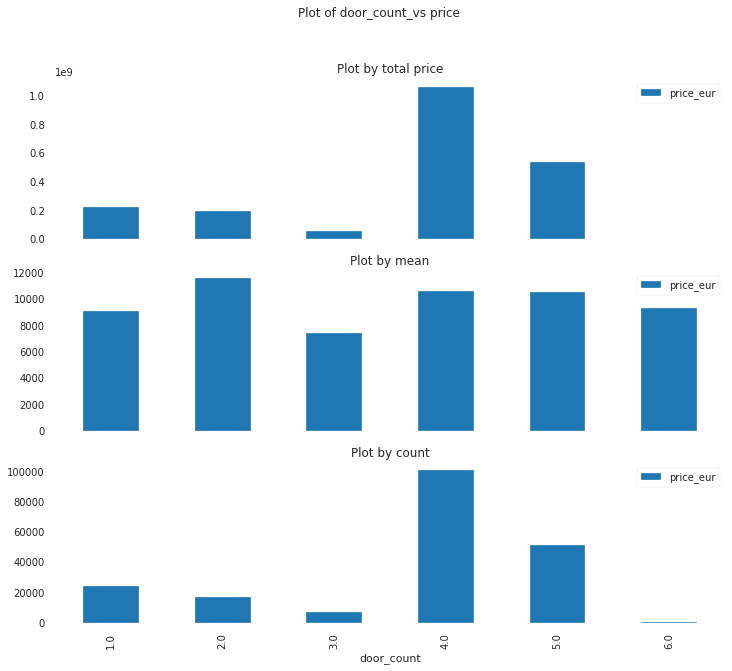

In [64]:
plot_of_price_vs_other(df1, 'price_eur', 'door_count', "Plot of door_count_vs price") 

This curve also shows that __door_count__ has no specific significance on __price_eur__.

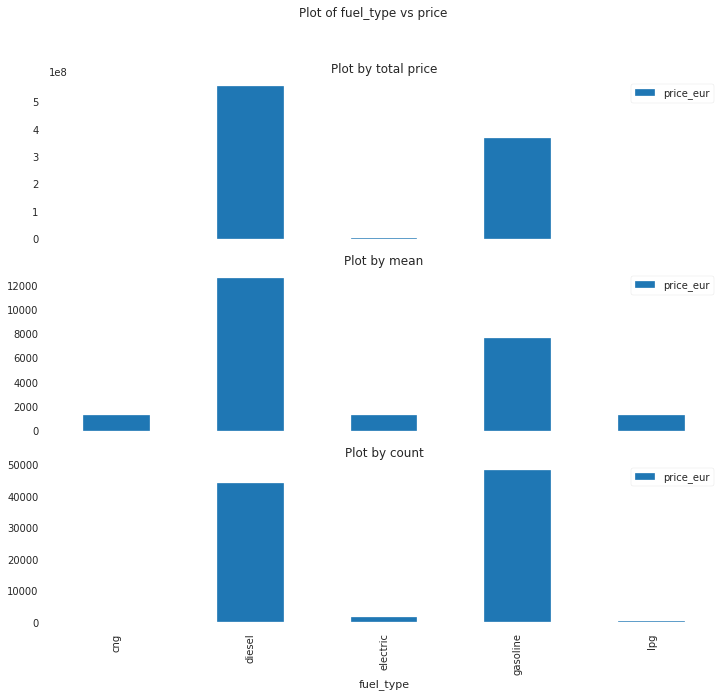

In [66]:
plot_of_price_vs_other(df1, 'price_eur', 'fuel_type', "Plot of fuel_type vs price") 

This shows that car with __fuel_type__ diesel is more expensive than the one with gasoline, electric and lpg.

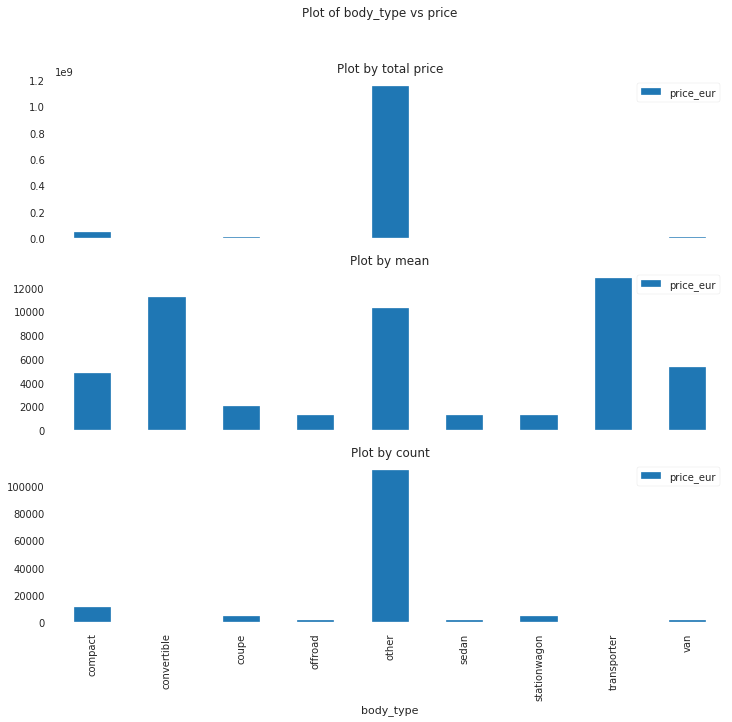

In [67]:
plot_of_price_vs_other(df1, 'price_eur', 'body_type', "Plot of body_type vs price") 

This shows that __body_type__ has more significance on __price_eur__.

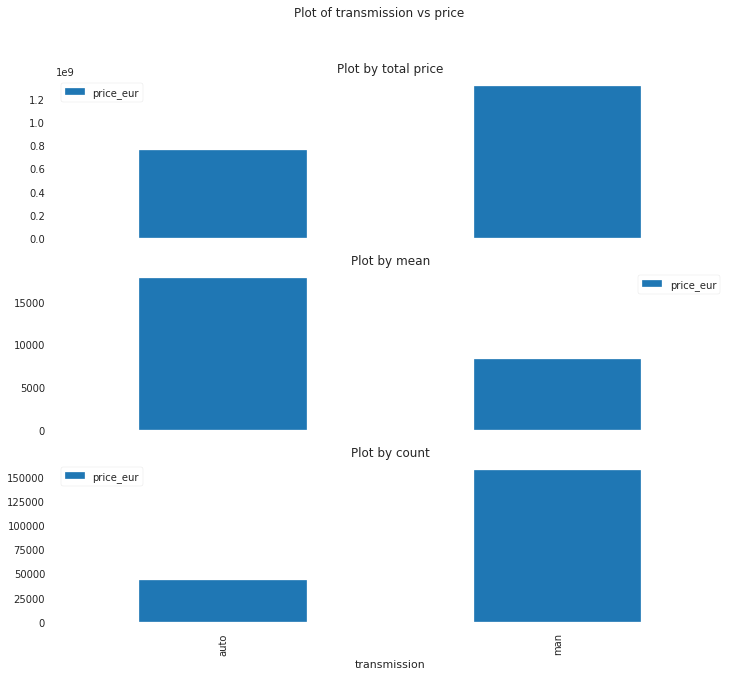

In [83]:
plot_of_price_vs_other(df1, 'price_eur', 'transmission', "Plot of transmission vs price") 

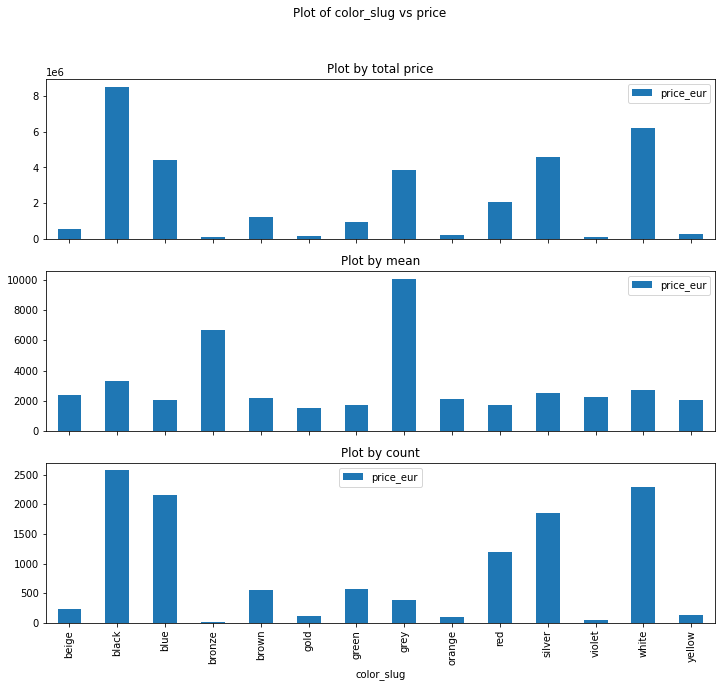

In [37]:
plot_of_price_vs_other(df, 'price_eur', 'color_slug', "Plot of color_slug vs price") 

This shows car with __transmission__ = auto are expensive.

## Preprocesssing

In [21]:
df1.apply(lambda x: sum(x.isnull()))

maker                   28181
model                   62044
mileage                 17748
manufacture_year        18777
engine_displacement     40790
engine_power            29132
body_type               63995
stk_year                97641
transmission                0
door_count                  0
seat_count                  0
fuel_type              105319
date_created                0
date_last_seen              0
price_eur                   0
dtype: int64

#### Imputation of __engine_power__. 

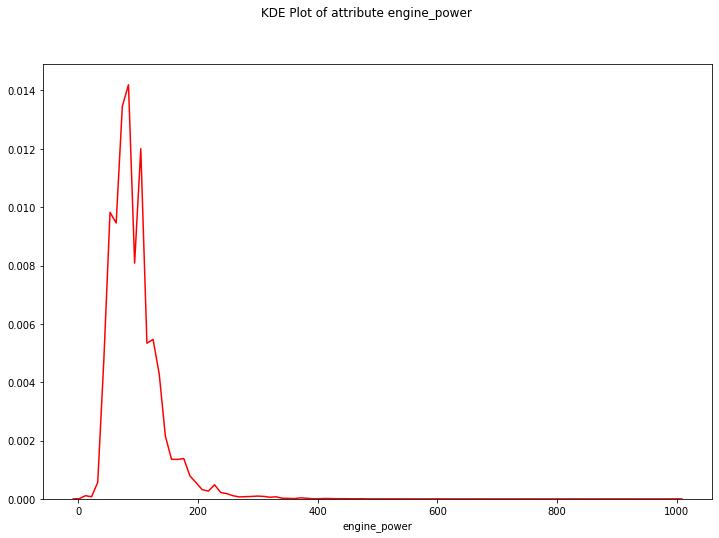

In [22]:
fig, ax = plt.subplots(figsize = (12,8))
fig.suptitle("KDE Plot of attribute engine_power")
sns.distplot(df1['engine_power'], kde = True, hist = False, color = 'red', ax = ax)


This shows that attribute __engine_power__ contains outliers. We will drop tuple with engine power greater than 300.

In [23]:
index = df1.loc[df1['engine_power']>300].index
df1 = df1.drop(index)
df1 = df1.reset_index()

Let's again see the kde plot

In [24]:
df1.drop(['index'], axis = 1, inplace = True)
df1.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,seat,leon,178000.0,2000.0,1390.0,55.0,NaN,None,man,4.0,5.0,gasoline,2016-01-03 19:42:48.205853+00:00,2016-01-07 00:56:35.766128+00:00,2500.30
1,NaN,NaN,135000.0,2007.0,1149.0,55.0,NaN,None,man,4.0,5.0,gasoline,2015-12-08 08:46:03.020179+00:00,2016-01-18 19:02:24.218185+00:00,2980.24
2,audi,NaN,138000.0,2005.0,1984.0,147.0,other,NaN,man,4.0,5.0,NaN,2016-03-05 22:09:11.127858+00:00,2016-07-03 17:39:48.838084+00:00,8010.25
3,fiat,punto,105000.0,2009.0,NaN,NaN,NaN,None,man,1.0,5.0,gasoline,2015-12-12 19:48:16.546082+00:00,2016-01-02 10:02:05.676711+00:00,2300.26
4,opel,vectra,129385.0,2003.0,NaN,NaN,NaN,None,man,1.0,5.0,gasoline,2016-01-01 17:28:46.527414+00:00,2016-01-17 22:49:09.853789+00:00,2800.30


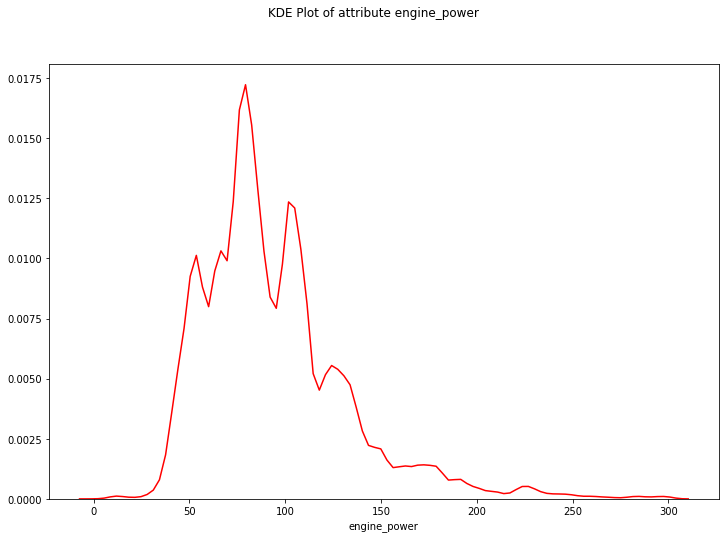

In [25]:
fig, ax = plt.subplots(figsize = (12,8))
fig.suptitle("KDE Plot of attribute engine_power")
sns.distplot(df1['engine_power'], kde = True, hist = False, color = 'red', ax = ax)


Let's see how many tuple are dropped here.

In [26]:
print("Number of tuple dropped: {}".format(len(df)-len(df1)))

Number of tuple dropped: 715


Let's now fill up missing value in __engine_power__ by grouping them based on the model.

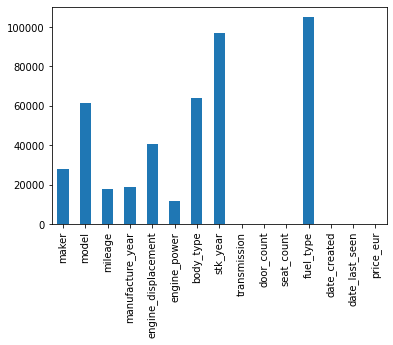

In [27]:
df1['engine_power']= df1['engine_power'].fillna(df1.groupby(['maker','model'])['engine_power'].transform('median'))
#Null value on remaining tuples
df1.apply(lambda x: sum(x.isnull())).plot(kind = 'bar')

In [153]:
# fill the rest of engine_power by median value
median = df1['engine_power'].median()
median
df1['engine_power']=df1['engine_power'].fillna('median')

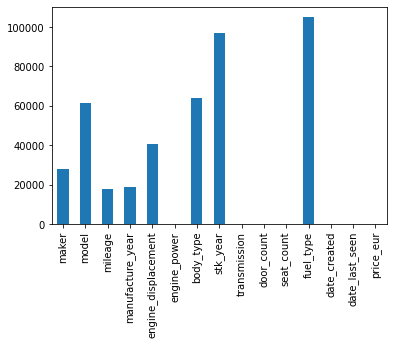

In [154]:
df1.apply(lambda x: sum(x.isnull())).plot(kind = 'bar')

#### Imputation of mileage

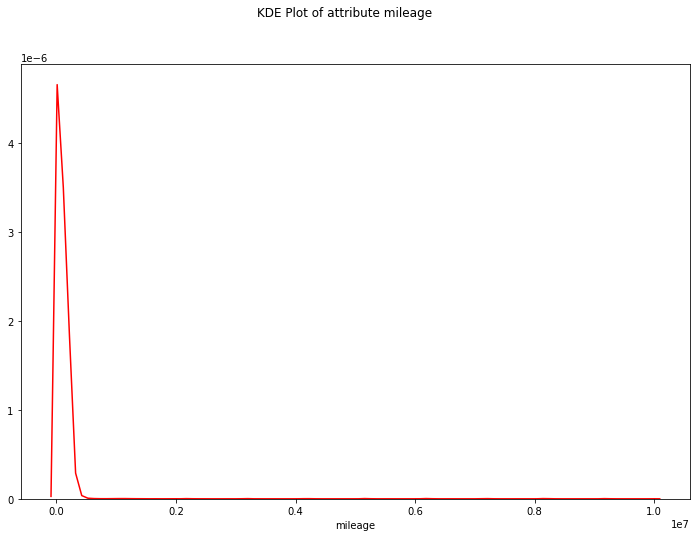

In [158]:
# kde plot of milaege
fig, ax = plt.subplots(figsize = (12,8))
fig.suptitle("KDE Plot of attribute mileage")
sns.distplot(df1['mileage'], kde = True, hist = False, color = 'red', ax = ax)

In [163]:
index = df1.loc[df1['mileage']>0.03*10**7].index
df1 = df1.drop(index)
df1 = df1.reset_index()


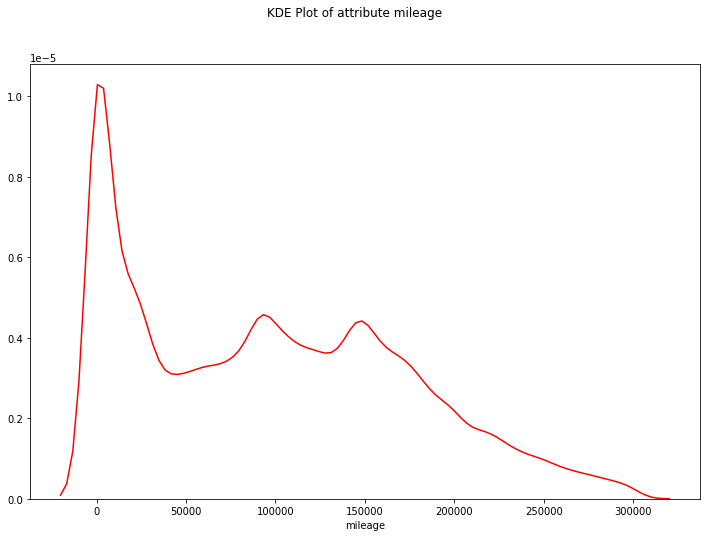

In [272]:
fig, ax = plt.subplots(figsize = (12,8))
fig.suptitle("KDE Plot of attribute mileage")
sns.distplot(df1['mileage'], kde = True, hist = False, color = 'red', ax = ax)

In [273]:
df1['mileage'].isnull().sum()

0

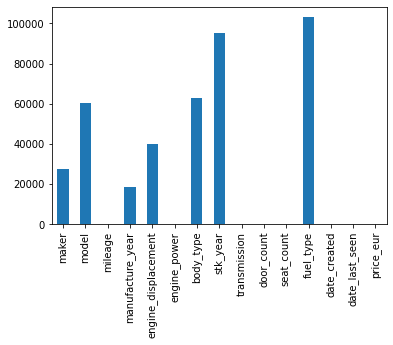

In [274]:
# We used the same procedure above to fill the missing value
df1['mileage']= df1['mileage'].fillna(df1.groupby(['maker','model'])['mileage'].transform('median'))
df1['mileage']= df1['mileage'].fillna(df1.groupby(['model'])['mileage'].transform('median'))
df1['mileage']= df1['mileage'].fillna(df1.groupby(['manufacture_year'])['mileage'].transform('median'))
df1['mileage'] = df1['mileage'].fillna(df1['mileage'].median())
df1.apply(lambda x: sum(x.isnull())).plot(kind = 'bar')

In [275]:
df1= df1.drop(['level_0', 'index'], axis = 1)

KeyError: "['level_0' 'index'] not found in axis"

Let's now collect the tuples with no null value in model and maker.


135257


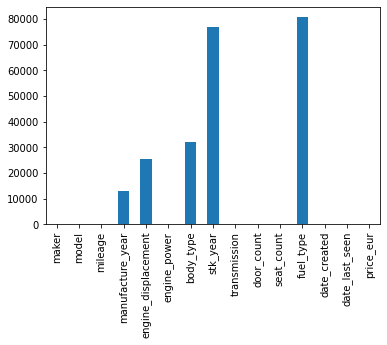

In [276]:
a = df1.loc[df1['maker'].isnull()].index
df2 = df1.drop(a)
a = df2.loc[df2['model'].isnull()].index
df2 = df2.drop(a)
df2.reset_index()
print(len(df2))
df2.apply(lambda x: sum(x.isnull())).plot(kind = 'bar')

### Imputation of fuel_type

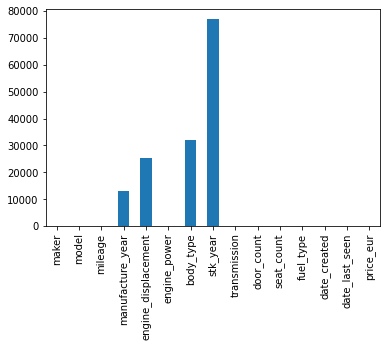

In [277]:
df2['fuel_type'] = df2['fuel_type'].fillna(df2.groupby(['model'])['fuel_type'].transform(lambda x: x.mode()[0] if not x.mode().empty==True else df2['fuel_type'].mode()[0]))
df2.apply(lambda x: sum(x.isnull())).plot(kind = 'bar')

### Imputation of body_type

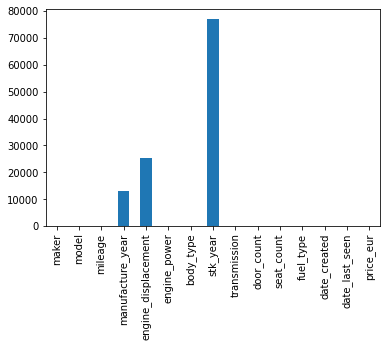

In [278]:
df2['body_type'] = df2['body_type'].fillna(df2.groupby(['model'])['body_type'].transform(lambda x: x.mode()[0] if not x.mode().empty==True else df2['body_type'].mode()[0]))
df2.apply(lambda x: sum(x.isnull())).plot(kind = 'bar')

### Imputation of engine_displacement

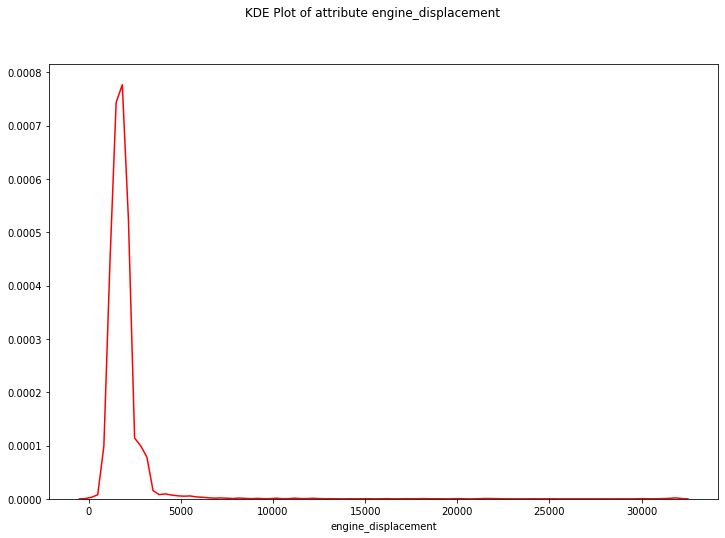

In [280]:
fig, ax = plt.subplots(figsize = (12,8))
fig.suptitle("KDE Plot of attribute engine_displacement")
sns.distplot(df1['engine_displacement'], kde = True, hist = False, color = 'red', ax = ax)

It definately contains outliers. So first remove outlier.

In [285]:
index = df2.loc[df2['engine_displacement']>4000].index
df2 = df2.drop(index)
df2 = df2.reset_index()

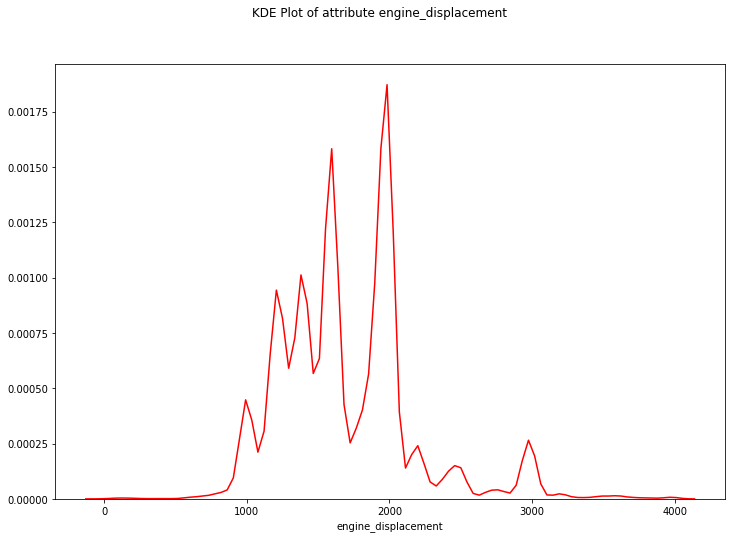

In [286]:
fig, ax = plt.subplots(figsize = (12,8))
fig.suptitle("KDE Plot of attribute engine_displacement")
sns.distplot(df2['engine_displacement'], kde = True, hist = False, color = 'red', ax = ax)

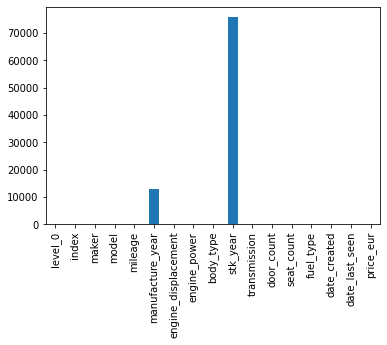

In [287]:
df2['engine_displacement']= df2['engine_displacement'].fillna(df2.groupby(['maker','model'])['engine_displacement'].transform('median'))
# df1['mileage']= df1['mileage'].fillna(df1.groupby(['model'])['mileage'].transform('median'))
df2['engine_displacement']= df2['engine_displacement'].fillna(df2.groupby(['manufacture_year'])['engine_displacement'].transform('median'))
df2['engine_displacement'] = df2['engine_displacement'].fillna(df2['mileage'].median())
df2.apply(lambda x: sum(x.isnull())).plot(kind = 'bar')

In [294]:
len(df2)

132997

Now we are let with 132997 rows out of 2 lakhs data. The decrease in the number of rows is due to the presence of nan in __model__ and __maker__ attribute as around 60K of data were nan in __model__ attribute. This is the sole reason for decrease in the value of tuples.

We will not use attribute __manufacture_year__ and __stk_year__ for model training. So we can drop them.